# Create a Random People/User Dataset

Creating a realistic people/user dataset can be helpful in many situations. This notebook shows how to generate one quickly and easily. The ideas in here can be extended to add further details as required (e.g. assign a random address from an address database)

In [1]:
import pandas as pd
import numpy as np
import datetime

### Helper functions

To create the dataset, random birthdays need to be created. The first function creates a random birthday between a min and max age. 

The second generates a random integer with a higher probability of a lower number. The first and last names are sorted by how common they are, so there is a higher probability of selecting a lower/more common name.

In [7]:
def generate_random_birthday(min_age, max_age):
    """ Generate a random birthday between min and max age"""
    today = datetime.date.today() # Get todays date
    startdate = today - datetime.timedelta(max_age * 365) # Subtract max_age to get startdate for random bdays
    enddate = today - datetime.timedelta(min_age * 365)
    number_of_days = enddate - startdate
    
    return startdate+datetime.timedelta(np.random.randint(1,number_of_days.days))

def lower_rand_int(min_int, max_int, power):
    """ Generate a random int with a higher probability of a lower number"""
    return int(min_int+(max_int-min_int)*np.random.rand()**power)

### Plot of random integer function

As can be seen in the plot, the lower integers are more common than higher.

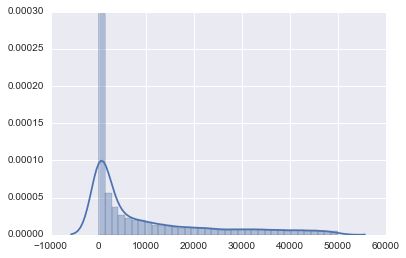

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

f = []
for i in range(0,10000):
    f.append(lower_rand_int(0, 50000, 4))

sns.distplot(f)

### Simple test of random birthday

In [9]:
generate_random_birthday(3,76)

datetime.date(1970, 7, 19)

### Wrap it all up in a function

Function to generate random names and birthdays. Loads the data, generates the names and returns a dataframe. A male/female probability is given to define the ratio between random males and females.

In [10]:
def generate_random_names(number, male_female_prob):
    mnames = pd.read_hdf('names.hf5','malename')
    fnames = pd.read_hdf('names.hf5','femalename')
    lnames = pd.read_hdf('names.hf5','lastname')
    
    szm = mnames.shape[0]-1
    szf = fnames.shape[0]-1
    szl = lnames.shape[0]-1
    
    # Create new dataframe to store data
    df = pd.DataFrame(index=range(0,number),columns=['firstname','lastname','sex','dob'])
    
    # Loop through and add firstname/lastname
    for i in range(0,number):
        if np.random.binomial(1,male_female_prob)==1:
            df['firstname'].iloc[i] = mnames['firstname'].iloc[lower_rand_int(0,szm,4)]
            df['sex'].iloc[i] = 1
        else:
            df['firstname'].iloc[i] = fnames['firstname'].iloc[lower_rand_int(0,szf,4)]
            df['sex'].iloc[i] = 2
        df['lastname'].iloc[i] = lnames['lastname'].iloc[lower_rand_int(0,szl,4)]
        df['dob'].iloc[i] = generate_random_birthday(2,75)
    return df

### Generate the random dataset

Generate 10,000 names with a male/female probability of 0.5

In [11]:
df = generate_random_names(10000,0.5)

In [14]:
df.head()

,firstname,lastname,sex,dob
0,Augusta,VELA,2,1964-06-22
1,Scott,PETERSON,1,1955-10-07
2,John,PAALMAN,1,1988-10-07
3,Salim,WAKI,1,1949-10-31
4,Orren,KROTZ,1,1986-06-14


### Check male/female ratio

In [15]:
df.sex.value_counts()

1    5019
2    4981
Name: sex, dtype: int64

### Counts of names

The number of common names selected can be reduced by decreasing the power for the random integer function. Increasing it will tend to select more popular names

In [19]:
names = df.firstname.value_counts()
names[0:30]

John         179
Mary         159
Anna          35
William       34
James         29
Frank         24
Elizabeth     23
Emma          23
Charles       21
Joseph        19
Ida           18
Henry         14
Bessie        13
George        13
Bertha        13
Alice         12
Edward        11
Annie         11
Charlie       11
Margaret      11
Robert        11
Tommie        11
Alfred        11
Jean          11
Dora          11
Helen         10
Sara          10
Sam           10
Leonard       10
Catherine     10
Name: firstname, dtype: int64